In [15]:
#data.ConceptDriftStream di scikit-multiflow

In [178]:
import skmultiflow as sk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.lof import LOF
import csv

dataset=pd.read_csv("SRdrift.csv" ,usecols=["A","B","C"])
verita=pd.read_csv("SRdrift.csv" ,usecols=["V"])
dataset_np= dataset.to_numpy()
verita_np=verita.to_numpy()

In [179]:
verita_list=[]
for elem in verita_np:
    verita_list.append(elem[0])

In [180]:
dataset_list=dataset_np.tolist()


In [181]:
#feature aggiuntiva per il rilevamento del concept drif
for i in range(0, len(dataset_list)):
    b=dataset_list[i]
    new_f=0
    for j in range(0, len(dataset_list[i])):
        new_f=new_f+dataset_list[i][j]**2
    b.append(new_f)
    dataset_list[i]=b

print(dataset_list[0])       

[-258.93763863437493, -654.1949132579581, -570.7438662976431, 820768.2461505153]


In [182]:
dataset_np2=np.array(dataset_list)
print(dataset_np)
print(dataset_np2)

[[-258.93763863 -654.19491326 -570.7438663 ]
 [-258.70523191 -655.15165221 -570.92558994]
 [-259.4375307  -653.76023233 -570.98461852]
 ...
 [-258.82138476 -654.07704964 -571.45474237]
 [-259.22645187 -654.94091298 -570.51667721]
 [-259.7429683  -654.39650835 -572.13457074]]
[[-2.58937639e+02 -6.54194913e+02 -5.70743866e+02  8.20768246e+05]
 [-2.58705232e+02 -6.55151652e+02 -5.70925590e+02  8.22108114e+05]
 [-2.59437531e+02 -6.53760232e+02 -5.70984619e+02  8.20733708e+05]
 ...
 [-2.58821385e+02 -6.54077050e+02 -5.71454742e+02  8.21365819e+05]
 [-2.59226452e+02 -6.54940913e+02 -5.70516677e+02  8.21635232e+05]
 [-2.59742968e+02 -6.54396508e+02 -5.72134571e+02  8.23039167e+05]]


In [183]:
#variabili modello
fine=False
successione_modelli_usati=[]
i_m=0 #modello attualmente in uso
f=0 #flag anomalia dati
g=0# flag anomalia modelli
n_batch=0
n_features= len(dataset_np2[0])
print(n_features)
len_W=50 #dimensione finestra dati 
len_CD=100 #dimensione finestra rilevamento concept drift
kswin_cf=[] #flag per feature di rilevamento concept drift
kswin_lof_model=[]
kswin_lof_model_cf=[] 
finestra_del_concetto=[]
dati_di_addestramento=[]
predizioni=[]
#utilizzo_modelli=[]
for i in range(0,n_features):
    kswin_cf.append(False)
print(kswin_cf)

4
[False, False, False, False]


In [184]:
#componenti modello
data_stream_cd= sk.data.DataStream(dataset_np2,y=None,target_idx=4)
data_stream_cd.print_df()
data_stream_cd.prepare_for_use()

data_stream= sk.data.DataStream(dataset_np,y=None,target_idx=3)
data_stream.print_df()
data_stream.prepare_for_use()

kswin=[]
#kswin_model=sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W)
for i in range(0,n_features):
    kswin.append(sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W))

#Model= LOF(n_neighbors=35, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=1)
Lof_models=[]

print(len(kswin))

[[-2.58937639e+02 -6.54194913e+02 -5.70743866e+02  8.20768246e+05]
 [-2.58705232e+02 -6.55151652e+02 -5.70925590e+02  8.22108114e+05]
 [-2.59437531e+02 -6.53760232e+02 -5.70984619e+02  8.20733708e+05]
 ...
 [-2.58821385e+02 -6.54077050e+02 -5.71454742e+02  8.21365819e+05]
 [-2.59226452e+02 -6.54940913e+02 -5.70516677e+02  8.21635232e+05]
 [-2.59742968e+02 -6.54396508e+02 -5.72134571e+02  8.23039167e+05]]
[]
[[-258.93763863 -654.19491326 -570.7438663 ]
 [-258.70523191 -655.15165221 -570.92558994]
 [-259.4375307  -653.76023233 -570.98461852]
 ...
 [-258.82138476 -654.07704964 -571.45474237]
 [-259.22645187 -654.94091298 -570.51667721]
 [-259.7429683  -654.39650835 -572.13457074]]
[]
4


c:\Users\Salvatore Drago\Desktop\progetto_lab\lib\site-packages\skmultiflow\data\base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


In [185]:
while fine!=True:
    n_batch+=1
    dati_cd=data_stream_cd.next_sample(batch_size=len_W)[0]
    dati=data_stream.next_sample(batch_size=len_W)[0]

    if len(dati_cd)!=0:
        for dato in dati_cd:
            for i in range(0, len(kswin)):
                kswin[i].add_element(dato[i])
                if kswin[i].detected_change()==True:
                    kswin_cf[i]=True
        for i in range(0, len(kswin_cf)):
            if kswin_cf[i]==True:
                print(f'Drift zone has been detected on feature {i} in batch {n_batch} with kswin')
            else:
                print(f'No Drift zone has been detected on feature {i} in batch {n_batch} with kswin')

        if n_batch==1:
            print(f"Primo batch, creazione modello di base:{i_m}")
            i_m=0
            kswin_lof_model_cf.append(False)
            kswin_lof_model.append(sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W))
            Lof_models.append(LOF(n_neighbors=20, algorithm='ball_tree', leaf_size=30, metric='minkowski', p=3, metric_params=None, contamination=0.1, n_jobs=1))
            Lof_models[i_m].fit(dati)
            y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
            finestra_del_concetto.append(y_conf)
            with open('SRdrift_risultati_SD.csv', 'a', newline='\n') as file:
                for i in range(0, len(y_pred)):
                    kswin_lof_model[i_m].add_element(y_conf[i])
                    writer = csv.writer(file)
                    writer.writerow([y_pred[i],y_conf[i],i_m])
                    predizioni.append(y_pred[i])
            successione_modelli_usati.append(i_m)
        else:
            print(f"Batch:{n_batch}")
            for i in range(0, len(kswin)):
                if kswin_cf[i]==True:
                    f=1
                    kswin_cf[i]=False
            if f==1:
                print(f"Rilevato concept drift")
                for i in range(0, len(Lof_models)):
                    print(f"Predizione modello:{i}")
                    y_pred_val,y_conf_val=Lof_models[i].predict(dati,return_confidence=True)
                    print(f"test modello:{i}")
                    for j in range(0, len(y_conf_val)):
                        kswin_lof_model[i].add_element(y_conf_val[j]) #dovra essere fatto append
                        if kswin_lof_model[i].detected_change()==True:
                            kswin_lof_model_cf[i]=True #dovra essere fatto append quando si crea il modello
                    if kswin_lof_model_cf[i]==True:
                        kswin_lof_model[i].reset()
                        print(f'Il modello {i} non è quello del concetto, viene resettato')
                        print(len(finestra_del_concetto[i]))
                        print(f"Sto ricaricando il concetto al modello:{i}")
                        for t in range(0, len(finestra_del_concetto[i])):
                            kswin_lof_model[i].add_element(finestra_del_concetto[i][t]) #reset con il concetto del modello
                    else:
                        g=0
                        i_m=i #sappiamo quale modello usare, quello per cui non è stato rilevato cd
                        break
                    g=1
                if g==0: #sappiamo quale modello usare, quello per cui non è stato rilevato cd
                    print(f"Utilizzo un modello che già avevo:{i_m}")
                    y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
                    with open('SRdrift_risultati_SD.csv', 'a', newline='\n') as file:
                        for i in range(0, len(y_pred)):
                            writer = csv.writer(file)
                            writer.writerow([y_pred[i],y_conf[i],i_m])
                            predizioni.append(y_pred[i])
                    successione_modelli_usati.append(i_m)
                    
                else: #creo nuovo modello addestrandolo sull'ultima finestra di dati
                    print("Devo creare un nuovo modello")
                    if len(Lof_models)<5: #mantengo un massimo di 5 modelli
                        kswin_lof_model_cf.append(False)
                        kswin_lof_model.append(sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W))
                        Lof_models.append(LOF(n_neighbors=25, algorithm='ball_tree', leaf_size=30, metric='minkowski', p=3, metric_params=None, contamination=0.1, n_jobs=1))
                        Lof_models[-1].fit(dati)
                        i_m=len(Lof_models)-1
                        y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
                        finestra_del_concetto.append(y_conf)
                        print(f"I modelli adesso sono:{len(Lof_models)}")
                        
                    else: # eventualmente elimino il più vecchio
                        print("I modelli erano 5, ho sostituito il piu vecchio")
                        kswin_lof_model_cf[0]=False
                        kswin_lof_model[0]=sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W)
                        Lof_models[0]=LOF(n_neighbors=20, algorithm='ball_tree', leaf_size=30, metric='minkowski', p=3, metric_params=None, contamination=0.1, n_jobs=1)
                        Lof_models[0].fit(dati)
                        i_m=0
                        y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
                        finestra_del_concetto[i_m]=y_conf
                    
                    with open('SRdrift_risultati_SD.csv', 'a', newline='\n') as file:
                        for i in range(0, len(y_pred)):
                            kswin_lof_model[i_m].add_element(y_conf[i])
                            writer = csv.writer(file)
                            writer.writerow([y_pred[i],y_conf[i],i_m])
                            predizioni.append(y_pred[i])
                    successione_modelli_usati.append(i_m)
            else: #continuo ad usare l'ultimo modello selezionato
                print(f"Concept drift non rilevato, modello in uso:{i_m}")
                y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
                with open('SRdrift_risultati_SD.csv', 'a', newline='\n') as file:
                    for i in range(0, len(y_pred)):
                        writer = csv.writer(file)
                        writer.writerow([y_pred[i],y_conf[i],i_m])
                        predizioni.append(y_pred[i])
                successione_modelli_usati.append(i_m)
    else:
        print("Fine")
        fine=True


No Drift zone has been detected on feature 0 in batch 1 with kswin
No Drift zone has been detected on feature 1 in batch 1 with kswin
No Drift zone has been detected on feature 2 in batch 1 with kswin
No Drift zone has been detected on feature 3 in batch 1 with kswin
Primo batch, creazione modello di base:0
No Drift zone has been detected on feature 0 in batch 2 with kswin
No Drift zone has been detected on feature 1 in batch 2 with kswin
No Drift zone has been detected on feature 2 in batch 2 with kswin
No Drift zone has been detected on feature 3 in batch 2 with kswin
Batch:2
Concept drift non rilevato, modello in uso:0
Drift zone has been detected on feature 0 in batch 3 with kswin
Drift zone has been detected on feature 1 in batch 3 with kswin
No Drift zone has been detected on feature 2 in batch 3 with kswin
No Drift zone has been detected on feature 3 in batch 3 with kswin
Batch:3
Rilevato concept drift
Predizione modello:0
test modello:0
Utilizzo un modello che già avevo:0
No Dr

In [31]:
#Si hanno i modelli usati, la loro successione e i dati relativi al loro concetto, si possono mostare i grafici
'''import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

print(finestra_del_concetto[4])

fig=plt.figure()
for i in range(0, len(finestra_del_concetto)):
    df = pd.DataFrame(finestra_del_concetto[i], columns = ['Column_A','Column_B','Column_C'])

    ax= fig.add_subplot(i+1, projection='3d')
    x= finestra_del_concetto[i]

'''

[1.         1.         1.         0.83972772 0.90096515 0.30146064
 0.30146064 0.99999606 1.         1.         0.83972772 0.99916417
 0.99493727 1.         1.         1.         0.99789163 0.99999998
 0.99999968 1.         0.99999884 0.99968436 1.         1.
 1.         1.         1.         0.94870304 0.97496596 1.
 0.82084579 1.         1.         0.98844229 0.99996108 1.
 1.         1.         0.99998731 0.30146064 1.         1.
 0.99999991 1.         1.         1.         1.         1.
 0.99998731 1.        ]


"\nfig=plt.figure()\nfor i in range(0, len(finestra_del_concetto)):\n    df = pd.DataFrame(finestra_del_concetto[i], columns = ['Column_A','Column_B','Column_C'])\n\n    ax= fig.add_subplot(i+1, projection='3d')\n    x= finestra_del_concetto[i]"

0.9780380673499268
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1844
           1       0.92      0.86      0.89       205

    accuracy                           0.98      2049
   macro avg       0.95      0.92      0.94      2049
weighted avg       0.98      0.98      0.98      2049



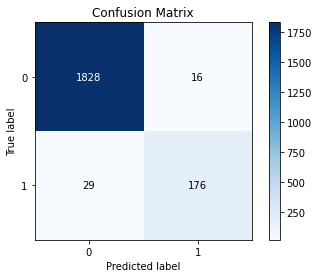

In [186]:
from sklearn.metrics import accuracy_score, classification_report
import scikitplot as skplt 
import matplotlib.pyplot as plt

predizioni_np=np.array(predizioni)
verita_np=np.array(verita_list)



acc=accuracy_score(verita_np,predizioni_np)
print(acc)

report=classification_report(verita_np,predizioni_np)
print(report)


skplt.metrics.plot_confusion_matrix(verita_np,predizioni_np)
plt.show()


In [104]:
'''#concept drift detection with HDDM_A(disuguaglianza di Hoeffding) e KSWIN
for dato in dati:
  for i in range(0, len(kswin)):
      kswin[i].add_element(dato[i])
      if kswin[i].detected_change()==True:
        kswin_cf[i]=True
  

for i in range(0, len(kswin_cf)):
  if kswin_cf[i]==True:
    print(f'Drift zone has been detected on feature {i} in batch {n_batch} with kswin')
  else:
    print(f'No Drift zone has been detected on feature {i} in batch {n_batch} with kswin')
'''

Drift zone has been detected on feature 0 in batch 23 with kswin
Drift zone has been detected on feature 1 in batch 23 with kswin
No Drift zone has been detected on feature 2 in batch 23 with kswin
No Drift zone has been detected on feature 3 in batch 23 with kswin


In [8]:
'''with open('SRdrift_risultati.csv', 'a', newline='\n') as file:
    writer = csv.writer(file)
    writer.writerow(['y_pred','y_conf','modello'])'''

In [105]:
'''if n_batch==1:
    print(f"Primo batch, creazione modello di base:{i_m}")
    i_m=0
    kswin_lof_model_cf.append(False)
    kswin_lof_model.append(sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W))
    Lof_models.append(LOF(n_neighbors=35, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=1))
    Lof_models[i_m].fit(dati)
    y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
    finestra_del_concetto.append(y_conf)
    with open('SRdrift_risultati.csv', 'a', newline='\n') as file:
        for i in range(0, len(y_pred)):
            kswin_lof_model[i_m].add_element(y_conf[i])
            writer = csv.writer(file)
            writer.writerow([y_pred[i],y_conf[i],i_m])
else:
    print(f"Batch:{n_batch}")
    for i in range(0, len(kswin)):
        if kswin_cf[i]==True:
            f=1
            kswin_cf[i]=False
    if f==1:
        print(f"Rilevato concept drift")
        for i in range(0, len(Lof_models)):
            print(f"Predizione modello:{i}")
            y_pred_val,y_conf_val=Lof_models[i].predict(dati,return_confidence=True)
            print(f"test modello:{i}")
            for j in range(0, len(y_conf_val)):
                kswin_lof_model[i].add_element(y_conf_val[j]) #dovra essere fatto append
                if kswin_lof_model[i].detected_change()==True:
                    kswin_lof_model_cf[i]=True #dovra essere fatto append quando si crea il modello
            if kswin_lof_model_cf[i]==True:
                kswin_lof_model[i].reset()
                print(f'Il modello {i} non è quello del concetto, viene resettato')
                print(len(finestra_del_concetto[i]))
                print(f"Sto ricaricando il concetto al modello:{i}")
                for t in range(0, len(finestra_del_concetto[i])):
                    kswin_lof_model[i].add_element(finestra_del_concetto[i][t]) #reset con il concetto del modello
            else:
                g=0
                i_m=i #sappiamo quale modello usare, quello per cui non è stato rilevato cd
                break
            g=1
        if g==0: #sappiamo quale modello usare, quello per cui non è stato rilevato cd
            print(f"Utilizzo un modello che già avevo:{i_m}")
            y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
            with open('SRdrift_risultati.csv', 'a', newline='\n') as file:
                for i in range(0, len(y_pred)):
                    writer = csv.writer(file)
                    writer.writerow([y_pred[i],y_conf[i],i_m])
            
        else: #creo nuovo modello addestrandolo sull'ultima finestra di dati
            print("Devo creare un nuovo modello")
            if len(Lof_models)<5: #mantengo un massimo di 5 modelli
                kswin_lof_model_cf.append(False)
                kswin_lof_model.append(sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W))
                Lof_models.append(LOF(n_neighbors=35, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=1))
                Lof_models[-1].fit(dati)
                i_m=len(Lof_models)-1
                y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
                finestra_del_concetto.append(y_conf)
                print(f"I modelli adesso sono:{len(Lof_models)}")
                
            else: # eventualmente elimino il più vecchio
                print("I modelli erano 5, ho sostituito il piu vecchio")
                kswin_lof_model_cf[0]=False
                kswin_lof_model[0]=sk.drift_detection.KSWIN(alpha=0.005, window_size=len_CD-1, stat_size=len_W)
                Lof_models[0]=LOF(n_neighbors=35, algorithm='auto', leaf_size=30, metric='minkowski', p=2, metric_params=None, contamination=0.1, n_jobs=1)
                Lof_models[0].fit(dati)
                i_m=0
                y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
                finestra_del_concetto[i_m]=y_conf
            
            with open('SRdrift_risultati.csv', 'a', newline='\n') as file:
                for i in range(0, len(y_pred)):
                    kswin_lof_model[i_m].add_element(y_conf[i])
                    writer = csv.writer(file)
                    writer.writerow([y_pred[i],y_conf[i],i_m])
    else: #continuo ad usare l'ultimo modello selezionato
        print(f"Concept drift non rilevato, modello in uso:{i_m}")
        y_pred,y_conf=Lof_models[i_m].predict(dati,return_confidence=True)
        with open('SRdrift_risultati.csv', 'a', newline='\n') as file:
            for i in range(0, len(y_pred)):
                writer = csv.writer(file)
                writer.writerow([y_pred[i],y_conf[i],i_m])'''

Batch:23
Rilevato concept drift
Predizione modello:0
test modello:0
Il modello 0 non è quello del concetto, viene resettato
50
Sto ricaricando il concetto al modello:0
Predizione modello:1
test modello:1
Il modello 1 non è quello del concetto, viene resettato
50
Sto ricaricando il concetto al modello:1
Predizione modello:2
test modello:2
Il modello 2 non è quello del concetto, viene resettato
50
Sto ricaricando il concetto al modello:2
Predizione modello:3
test modello:3
Il modello 3 non è quello del concetto, viene resettato
50
Sto ricaricando il concetto al modello:3
Predizione modello:4
test modello:4
Il modello 4 non è quello del concetto, viene resettato
50
Sto ricaricando il concetto al modello:4
Devo creare un nuovo modello
I modelli erano 5, ho sostituito il piu vecchio
6
